![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/cost-of-living/cost-of-living-2016.csv
/kaggle/input/cost-of-living/cost-of-living-2017.csv
/kaggle/input/cost-of-living/cost-of-living-2018.csv
/kaggle/input/krakow-ta-restaurans-data-raw/TA_restaurants_curated.csv
/kaggle/input/world-cities-datasets/worldcities.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [6]:
# также добавляю данные по городам - население, страна, столица, стоимость жизни.
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
cities_df = pd.read_csv('/kaggle/input/world-cities-datasets/worldcities.csv')
cost_df = pd.read_csv('/kaggle/input/cost-of-living/cost-of-living-2017.csv')
ta_df = pd.read_csv('/kaggle/input/krakow-ta-restaurans-data-raw/TA_restaurants_curated.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [25]:
cities_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
15488,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
15489,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
15490,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
15491,Nordvik,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


Проще добавить словарь со столицами и пройтись по нему, и с популяцией.

In [26]:
cities_df.drop(['city', 'lat', 'lng', 'country', 'iso2', 'iso3', 'admin_name', 'id'], axis = 1, inplace=True)

In [27]:
cities_df

,city_ascii,capital,population
0,Tokyo,primary,35676000.0
1,New York,NaN,19354922.0
2,Mexico City,primary,19028000.0
3,Mumbai,admin,18978000.0
4,Sao Paulo,admin,18845000.0
...,...,...,...
15488,Timmiarmiut,NaN,10.0
15489,Cheremoshna,NaN,0.0
15490,Ambarchik,NaN,0.0
15491,Nordvik,NaN,0.0


In [10]:
cost_df

,City,State,Country,Cost of Living Plus Rent Index,CLI,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Leverage Model 1,Leverage Model 2
0,Zurich,NaN,Switzerland,108.77,149.53,66.76,163.71,140.58,126.30,0.042957,0.041121
1,Hamilton,NaN,Bermuda,133.20,148.13,117.80,145.20,152.54,93.42,0.077443,0.041137
2,Zug,NaN,Switzerland,105.54,142.54,67.39,148.36,143.18,105.62,0.034928,0.034619
3,Geneva,NaN,Switzerland,106.73,142.12,70.25,147.13,138.96,115.20,0.030242,0.030232
4,Basel,NaN,Switzerland,97.47,142.02,51.54,149.54,131.72,113.13,0.038061,0.032146
...,...,...,...,...,...,...,...,...,...,...,...
506,Bhubaneswar,NaN,India,15.06,25.24,4.57,28.87,14.71,52.38,0.007596,0.007588
507,Coimbatore,NaN,India,15.37,24.83,5.61,26.31,15.29,47.01,0.007420,0.007389
508,Alexandria,NaN,Egypt,14.96,24.54,5.09,23.50,17.66,21.42,0.008922,0.008777
509,Mangalore,NaN,India,14.56,23.17,5.68,23.88,12.61,95.97,0.017638,0.017633


In [8]:
ta_df

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...,...
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13273526-Reviews-K...,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13292844-Reviews-B...,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13296092-Reviews-R...,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13323362-Reviews-Y...,d13323362


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [ ]:
df_train.head(5)

In [ ]:
df_test.info()

In [ ]:
df_test.head(5)

In [ ]:
sample_submission.head(5)

In [ ]:
sample_submission.info()

In [6]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [6]:
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


In [8]:
pd.merge(data, cost_df, how = 'left', on='City')

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,State,Country,Cost of Living Plus Rent Index,CLI,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Leverage Model 1,Leverage Model 2
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,NaN,France,68.23,89.98,45.80,87.30,88.30,89.07,0.005520,0.005071
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,NaN,Finland,63.88,87.24,39.80,76.39,92.69,99.09,0.007225,0.007214
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,NaN,United Kingdom,55.99,78.57,32.71,71.70,79.39,93.93,0.003854,0.003802
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,NaN,United Kingdom,81.48,89.34,73.37,67.70,96.34,77.75,0.038866,0.014505
4,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,NaN,Canada,48.74,72.36,24.38,72.67,66.58,94.42,0.003411,0.002387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57964,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,NaN,Italy,62.53,84.32,40.06,76.95,88.99,61.78,0.010366,0.010066
57965,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,NaN,France,68.23,89.98,45.80,87.30,88.30,89.07,0.005520,0.005071
57966,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,NaN,Sweden,67.46,91.21,42.98,87.98,91.35,88.09,0.005894,0.005854
57967,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,NaN,Poland,33.56,46.32,20.42,37.86,39.58,67.94,0.005215,0.004553


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [ ]:
data.sample(10)

In [ ]:
data.Reviews[1]

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


int64, float64 и object являются типами данных нашей таблицы. Мы видим, что одна особенность 7 столбцов имеет тип object, а оставшиеся являются числовыми. С помощью этого же метода мы можем легко увидеть, есть ли пропущенные значения - они есть в 4 столбцах.

In [6]:
data.shape

(50000, 11)

Посмотрим подробнее на количество пропущенных значений.

In [ ]:
# Function to calculate missing values by column
def missing_values_table(data):
    # Total missing values
    mis_val = data.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * data.isnull().sum() / len(data)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Датафрейм содержит " + str(data.shape[1]) + " колонок.\n"
          "Есть " + str(mis_val_table_ren_columns.shape[0]) +
          " колонок с пропущенными значениями.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(27)

Две колонки Price Range и Cuisine Style содержат большое количество пропусков. Ниже решим, как именно будем с ними работать. Целевая переменная Rating представлена без пропусков.

In [ ]:
#посмотрим какие колонки есть в датасете
print(data.columns)

In [8]:
#посмотрим на распределение числовых переменных
data.describe()

,Ranking,Number of Reviews,sample,Rating
count,50000.000000,46800.000000,50000.000000,50000.000000
mean,3664.427520,124.471197,0.800000,3.194430
std,3700.092452,294.114345,0.400004,1.705453
min,1.000000,2.000000,0.000000,0.000000
25%,972.000000,9.000000,1.000000,3.000000
50%,2278.000000,33.000000,1.000000,4.000000
75%,5241.000000,115.000000,1.000000,4.500000
max,16444.000000,9660.000000,1.000000,5.000000


Пока не вижу в таблице никакой интересной информации. Целевая переменная варьируется от 0 до 5, основаня масса значение лежит от 3 до 4.5. Столбец sample не показателен, тк служебный. Видим достаточно большой разброс в столбце Number of Reviews (std расположено достаточно далеко от mean).

In [ ]:
data.Restaurant_id

Можно попробовать преобразовать эту колонку - убрать 'id_' - и поискать связь с целевой переменной.

## **Restaurant_id**

Отредактируем столбец так, чтобы от поля id_Значение осталось только Значение. Проверим, что колонка изменила тип с object на int64.

In [7]:
data['Restaurant_id'][0][3:]

'0'

In [8]:
data['Restaurant_id'] = data['Restaurant_id'].apply(lambda x: x[3:])  

In [9]:
data['Restaurant_id'] = pd.to_numeric(data['Restaurant_id'], errors='coerce').fillna(0, downcast='infer')

In [10]:
data['Restaurant_id'].value_counts(dropna=False)

436      19
871      19
633      19
227      19
430      18
         ..
14784     1
6898      1
9597      1
15742     1
9140      1
Name: Restaurant_id, Length: 13094, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null int64
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 4.2+ MB


Есть рестораны, которые встречаются только один раз в таблице, а есть, возможно, сетевые. Посмотрим подробнее.

In [ ]:
data[data.Restaurant_id=='id_633']

Посмотрела несколько первых значений и единственное, что нашла, что их объединяет - стобец sample - один из учебного, другие из тестового сета. У ресторанов из учебного сета похожий Ranking и Price Range.

Предположение - что id объединяет рестораны с похожим рейтингом или ценовым сегментом.

In [9]:
data.groupby(['Restaurant_id'])['Rating'].count()

Restaurant_id
id_0       16
id_1       10
id_10      15
id_100     13
id_1000    12
           ..
id_9995     3
id_9996     1
id_9997     1
id_9998     1
id_9999     1
Name: Rating, Length: 13094, dtype: int64

Чем ближе порядковый номер id к 0, тем большее количество ресторанов представлено в датасете.

In [10]:
data.groupby(['Restaurant_id'])['Rating'].mean()

Restaurant_id
id_0       4.625000
id_1       4.150000
id_10      4.166667
id_100     4.000000
id_1000    3.833333
             ...   
id_9995    2.500000
id_9996    0.000000
id_9997    0.000000
id_9998    0.000000
id_9999    0.000000
Name: Rating, Length: 13094, dtype: float64

Предположим, что чем ближе порядковый номер id к 0, тем выше среднее значение. Проверим, с помощью гистограммы.

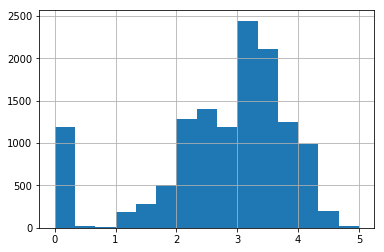

In [7]:
data.groupby(['Restaurant_id'])['Rating'].mean().hist(bins=15)

Видим, что распределение похоже на нормальное с выбросом в 0 (это наша тестовая выборка). У большинства ресторанов рейтинг колеблется от 3 до 4 баллов, тоже самое мы видели, когда применили метод describe(). Предположение не подтвердилось. 

Посмотрим, есть ли связь между ресторанами, целевой переменной и рангом ресторана.

In [11]:
data.groupby(['Restaurant_id'])['Ranking'].count()

Restaurant_id
id_0       16
id_1       10
id_10      15
id_100     13
id_1000    12
           ..
id_9995     3
id_9996     1
id_9997     1
id_9998     1
id_9999     1
Name: Ranking, Length: 13094, dtype: int64

In [12]:
data.groupby(['Restaurant_id'])['Ranking'].mean()

Restaurant_id
id_0        811.125000
id_1         12.400000
id_10        90.866667
id_100      338.076923
id_1000    1335.833333
              ...     
id_9995    8122.666667
id_9996    2612.000000
id_9997    5562.000000
id_9998    4010.000000
id_9999    6791.000000
Name: Ranking, Length: 13094, dtype: float64

В количестве ресторанов и их ранге картина похожая, что и в целевой переменной, а среднее распределение в столбце Ranking больше напоминает обратное целевой переменной. 

Проверим это предположение, построив гистограмму и посмотрев на распределение.

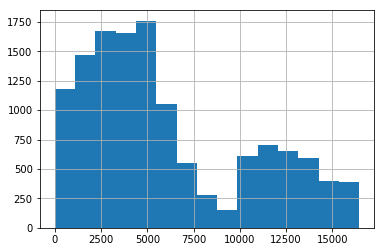

In [8]:
data.groupby(['Restaurant_id'])['Ranking'].mean().hist(bins=15)

# # **City**

In [ ]:
data.City

In [9]:
#посмотрим сколько городов участвует в выборке
len(data.City.value_counts(dropna=False))

31

In [10]:
print(data.groupby(['City'])['Rating'].count())
print(data.groupby(['City'])['Rating'].mean())
print(data.groupby(['City'])['Rating'].std())

City
Amsterdam     1372
Athens         776
Barcelona     3395
Berlin        2705
Bratislava     380
Brussels      1314
Budapest      1021
Copenhagen     819
Dublin         836
Edinburgh      745
Geneva         590
Hamburg       1186
Helsinki       475
Krakow         554
Lisbon        1647
Ljubljana      222
London        7193
Luxembourg     263
Lyon          1126
Madrid        3813
Milan         2694
Munich        1145
Oporto         642
Oslo           488
Paris         6108
Prague        1816
Rome          2589
Stockholm     1033
Vienna        1443
Warsaw         925
Zurich         685
Name: Rating, dtype: int64
City
Amsterdam     3.270044
Athens        3.423325
Barcelona     3.189985
Berlin        3.285952
Bratislava    3.144737
Brussels      3.153349
Budapest      3.268854
Copenhagen    3.206960
Dublin        3.269737
Edinburgh     3.270470
Geneva        3.230508
Hamburg       3.217538
Helsinki      3.124211
Krakow        3.315884
Lisbon        3.193685
Ljubljana     3.389640
London

Предположение - вне зависимости от численности соотношение плохих и хороших ресторанов будет примерно одинаковым.
Предположение - в столицах рестораны лучше.

Как видим, что общий разброс, что рейтинг - все примерно одинаково.

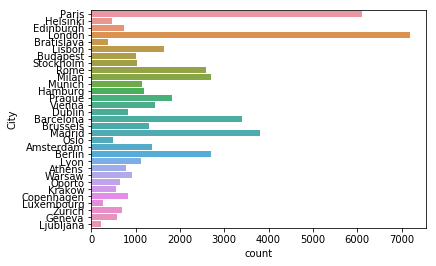

In [15]:
sns.countplot(y='City', data=data, label='City')

Видно, что со значительным опережением в количестве ресторанов идут Лондон и Париж. 

Предположение - попробовать кодировать в хот и даммис и сравнить.

## **Cuisine Style**

In [18]:
data['Cuisine Style'][3]

"['Italian', 'Mediterranean', 'European', 'Vegetarian Friendly', 'Gluten Free Options']"

В ячейке список из кухонь, которые можно попробовать в ресторане. Лучше преобразовать столбец для дальнейшей работы.

Предположение - чем больше вариантов кухонь в одном ресторане, тем ниже рейтинг.
Предположение - нет связи между типом кухни и рейтингом.

In [20]:
# фильтруем нулевые значения
data[pd.isnull(data['Cuisine Style'])]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0
10,id_10,Rome,NaN,1209.0,NaN,306.0,"[['Very pretentious, but drinks are top notch'...",/Restaurant_Review-g187791-d7818546-Reviews-Je...,d7818546,0,0.0
13,id_13,Hamburg,NaN,1000.0,NaN,30.0,"[['Surprisingly good pizza', 'Yummy'], ['09/28...",/Restaurant_Review-g187331-d1344523-Reviews-Il...,d1344523,0,0.0
18,id_18,Vienna,NaN,3360.0,NaN,2.0,"[[], []]",/Restaurant_Review-g190454-d8435085-Reviews-An...,d8435085,0,0.0
20,id_20,Barcelona,NaN,6085.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187497-d8334752-Reviews-Re...,d8334752,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49981,id_924,Lyon,NaN,925.0,NaN,29.0,"[[], []]",/Restaurant_Review-g187265-d5850306-Reviews-Re...,d5850306,1,4.0
49983,id_2487,Amsterdam,NaN,2494.0,NaN,2.0,"[['Italian food, as in Italy!'], ['05/24/2015']]",/Restaurant_Review-g188590-d8120959-Reviews-Sa...,d8120959,1,4.5
49986,id_7274,Madrid,NaN,7279.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212,1,3.0
49988,id_4968,Berlin,NaN,4970.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,4.0


In [15]:
# пробуем заменить все нулевые значения на none
data['Cuisine Style'].fillna("['none']", inplace=True)

Затем я хочу поместить каждое значение в поле 'Cuisine Style' в отдельную строку, соответсвующую ресторано. Преобразуем.

In [16]:
prepared_data=data['Cuisine Style'].apply(lambda x: x.strip('][').split(', ')).apply(pd.Series).merge(data, left_index = True, right_index = True) \
.drop(['Cuisine Style'], axis=1)

In [17]:
cusine_data = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'], value_name = 'cusine') \
.drop(['variable'], axis=1) \
.dropna(subset=['cusine'])

In [28]:
cusine_data.shape

(131266, 11)

После преобразований у нас осталось такое же количество столбцов, но количество строчек стало 131266.

In [18]:
cusine_data.cusine.value_counts()

'Vegetarian Friendly'    14021
'European'               12561
'none'                   11590
'Mediterranean'           7820
'Italian'                 7433
                         ...  
'Fujian'                     2
'Burmese'                    1
'Latvian'                    1
'Xinjiang'                   1
'Salvadoran'                 1
Name: cusine, Length: 126, dtype: int64

Всего в поле 'Cuisine Style' было представлено 126 уникальных значений, включая рестораны со значением 'none'. Не совсем понимаю, как их лучше преобразовать для модели, попробую объединить кухни, которые встречаются в 10% ресторанов или как-то сгруппировать их.

!!!!!!!!!

Посмотрим какое количество кухонь в представлено в среднем в ресторане.

In [30]:
print(cusine_data.groupby(['ID_TA'])['cusine'].count().mean())

2.6272641754898625


## **Reviews**

In [11]:
#в столбце 'Reviews' находится 2 последних отзыва и даты этих отзывов
data['Reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Что можно сделать с этим столбцом?
Можно разделить отзывы и их дату, и проанализировать их отдельно. 
Например, чем свежее отзывы у ресторана, тем лучше рейтинг. Или чем меньше разница между отзывами, тем лучше рейтинг. 
Я почитала про оценку тональности текста, но не успела разобраться. Было бы интересно присвоить какие-то значения числовые всем отзывам и проверить насколько они влияют на модель, если так вообще можно.

In [31]:
# посмотрим на нулевые значения в столбце Reviews
data[pd.isnull(data['Reviews'])]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
8168,id_8168,Lisbon,['none'],3389.0,NaN,2.0,NaN,/Restaurant_Review-g189158-d12683988-Reviews-O...,d12683988,0,0.0
9608,id_9608,Vienna,['none'],1779.0,NaN,NaN,NaN,/Restaurant_Review-g190454-d12605368-Reviews-R...,d12605368,0,0.0


In [6]:
# заменим их
data['Reviews'].fillna("[[],[]]", inplace=True)

In [7]:
# вытащим дату отзывов в отдельный столбец
prep_data=data['Reviews'].apply(lambda x: x.strip('][').partition('], [')[2].split(', ')).apply(pd.Series)

In [8]:
prep_data = prep_data.merge(data, left_index = True, right_index = True)

In [17]:
prep_data

,0,1,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,,NaN,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,'12/05/2017','10/29/2017',id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,'12/28/2017','12/06/2017',id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,'12/06/2017','11/22/2017',id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,'02/08/2018','01/24/2018',id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,'12/16/2017','11/12/2017',id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,'12/21/2017','12/12/2017',id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,'11/03/2016','04/12/2008',id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,'07/11/2017','06/18/2017',id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


In [18]:
todatetime_data = prep_data.melt(id_vars = ['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'], value_name = 'date') \
.drop(['variable'], axis=1) \
.dropna(subset=['date'])

In [19]:
# преобразуем значения в дату
todatetime_data['date'] = pd.to_datetime(todatetime_data['date'])

In [20]:
todatetime_data.date.max()

Timestamp('2018-02-26 00:00:00')

In [21]:
todatetime_data.date.max() - todatetime_data.date.min()

Timedelta('5059 days 00:00:00')

## **Price Range**

In [23]:
#Цены в ресторане представлены в 3 категориях
data['Price Range']

0        $$ - $$$
1        $$ - $$$
2        $$ - $$$
3            $$$$
4            $$$$
           ...   
49995    $$ - $$$
49996    $$ - $$$
49997         NaN
49998    $$ - $$$
49999    $$ - $$$
Name: Price Range, Length: 50000, dtype: object

Предположим, что чем дороже ресторан, тем выше у него рейтинг. 

In [24]:
data['Price Range'].value_counts(dropna=False, normalize=True)

$$ - $$$    0.46082
NaN         0.34722
$           0.15632
$$$$        0.03564
Name: Price Range, dtype: float64

In [25]:
print(data.groupby(['Price Range'])['Rating'].count())
print(data.groupby(['Price Range'])['Rating'].mean())
print(data.groupby(['Price Range'])['Rating'].std())

Price Range
$            7816
$$ - $$$    23041
$$$$         1782
Name: Rating, dtype: int64
Price Range
$           3.287615
$$ - $$$    3.186342
$$$$        3.357744
Name: Rating, dtype: float64
Price Range
$           1.719258
$$ - $$$    1.670389
$$$$        1.740973
Name: Rating, dtype: float64


Больше всего ресторанов представлено в среднем ценовом сегменте. Среднее и среднее квадратическое отклонение целевой переменной составляют около 3.3 и 1.7, вне зависимости от ценового сегмента. Поэтому предположение о связи рейтинга и стоимости меню в ресторане не подтвердилось. 

In [7]:
data[pd.isnull(data['Price Range'])]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0
9,id_9,Stockholm,['Italian'],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,0.0
10,id_10,Rome,NaN,1209.0,NaN,306.0,"[['Very pretentious, but drinks are top notch'...",/Restaurant_Review-g187791-d7818546-Reviews-Je...,d7818546,0,0.0
13,id_13,Hamburg,NaN,1000.0,NaN,30.0,"[['Surprisingly good pizza', 'Yummy'], ['09/28...",/Restaurant_Review-g187331-d1344523-Reviews-Il...,d1344523,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49988,id_4968,Berlin,NaN,4970.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,4.0
49989,id_8887,London,['International'],8896.0,NaN,NaN,"[['I love this place!'], ['08/24/2015']]",/Restaurant_Review-g186338-d5550626-Reviews-Th...,d5550626,1,5.0
49990,id_1187,Oporto,"['European', 'Portuguese']",1188.0,NaN,14.0,"[['Traditional ""home cooked"" food for an ""eco....",/Restaurant_Review-g189180-d3612719-Reviews-D_...,d3612719,1,4.5
49993,id_6057,Paris,NaN,6058.0,NaN,16.0,"[['Naught but VERY nice', 'Yum'], ['01/23/2017...",/Restaurant_Review-g187147-d10532509-Reviews-B...,d10532509,1,4.0


In [6]:
#попробуем заполнить пропуски на наиболее частотное значение
data['Price Range'].fillna("$$ - $$$", inplace=True)

Далее перекодируем переменную в числовой вид и посмотрим боксплот.

## **URL_TA и ID_TA**

In [13]:
#страница ресторана на 'www.tripadvisor.com' 
data['URL_TA'][0]

'/Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html'

Не уверена, что этот столбец нужен, но можно попробовать вытащить из ссылки название ресторана и предположить, что чем больше букв в названии, тем выше рейтинг.

In [14]:
#ID ресторана в TripAdvisor
data['ID_TA']

0        d10746918
1         d6674944
2        d13129638
3          d680417
4         d1112354
           ...    
49995     d2104414
49996     d1800036
49997      d947615
49998     d1100838
49999     d1109020
Name: ID_TA, Length: 50000, dtype: object

In [15]:
data['ID_TA'].value_counts()

d13002276    2
d10316215    2
d10047799    2
d11674463    2
d8753348     2
            ..
d4737280     1
d6553200     1
d10024931    1
d2718672     1
d12682442    1
Name: ID_TA, Length: 49963, dtype: int64

Пока склоняюсь к тому, что эти столбцы буду удалять.

## **Ranking**

In [44]:
#Ранг ресторана относительно других ресторанов в этом городе
data['Ranking'].describe()

count    50000.000000
mean      3664.427520
std       3700.092452
min          1.000000
25%        972.000000
50%       2278.000000
75%       5241.000000
max      16444.000000
Name: Ranking, dtype: float64

In [17]:
print(data.groupby(['Ranking'])['Rating'].count())
print(data.groupby(['Ranking'])['Rating'].mean())
print(data.groupby(['Ranking'])['Rating'].std())

Ranking
1.0        15
2.0        12
3.0        17
4.0        11
5.0        15
           ..
16435.0     1
16437.0     1
16441.0     1
16443.0     1
16444.0     1
Name: Rating, Length: 12975, dtype: int64
Ranking
1.0        4.933333
2.0        3.458333
3.0        3.852941
4.0        3.454545
5.0        4.033333
             ...   
16435.0    1.000000
16437.0    1.000000
16441.0    1.000000
16443.0    0.000000
16444.0    1.000000
Name: Rating, Length: 12975, dtype: float64
Ranking
1.0        0.175933
2.0        2.093913
3.0        1.852066
4.0        2.229961
5.0        1.652559
             ...   
16435.0         NaN
16437.0         NaN
16441.0         NaN
16443.0         NaN
16444.0         NaN
Name: Rating, Length: 12975, dtype: float64


In [8]:
data['Ranking'].value_counts(dropna=False, normalize=True)

93.0       0.00044
72.0       0.00042
491.0      0.00042
842.0      0.00042
1013.0     0.00040
            ...   
8027.0     0.00002
10415.0    0.00002
14621.0    0.00002
11766.0    0.00002
10585.0    0.00002
Name: Ranking, Length: 12975, dtype: float64

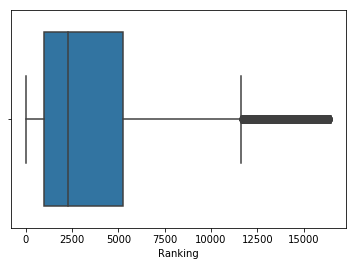

In [9]:
sns.boxplot(data['Ranking'])

Если я правильно поняла, то чем выше ранг ресторана, тем лучше. По боксплоту видим, что большинство ресторанов занимают позицию от 1000 до 5200, а максимально возможная - 16444.

## **Rating**

In [19]:
#целевая переменная
data['Rating']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49995    4.5
49996    3.5
49997    4.5
49998    4.0
49999    3.0
Name: Rating, Length: 50000, dtype: float64

In [20]:
data['Rating'].value_counts(dropna=False, normalize=True)

4.0    0.27384
4.5    0.21858
0.0    0.20000
3.5    0.13648
5.0    0.07758
3.0    0.05910
2.5    0.01830
2.0    0.00932
1.0    0.00402
1.5    0.00278
Name: Rating, dtype: float64

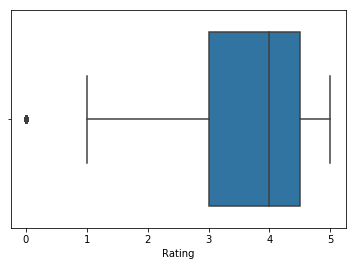

In [42]:
sns.boxplot(data['Rating'])

Целевая перемення представлена из двух наборов данных - тест и трейн. В учебном наборе преобладают рестораны с отзывами 3.5, 4.5, 4.0.

## **Number of Reviews**

In [21]:
#Количество отзывов
data['Number of Reviews']

0          4.0
1         97.0
2         28.0
3        202.0
4        162.0
         ...  
49995     79.0
49996    542.0
49997      4.0
49998     70.0
49999    260.0
Name: Number of Reviews, Length: 50000, dtype: float64

In [22]:
data['Number of Reviews'].value_counts(dropna=False, normalize=True)

NaN       0.06400
2.0       0.04806
3.0       0.04084
4.0       0.03414
5.0       0.02942
           ...   
5216.0    0.00002
1932.0    0.00002
1050.0    0.00002
1145.0    0.00002
1471.0    0.00002
Name: Number of Reviews, Length: 1574, dtype: float64

In [23]:
print(data.groupby(['Number of Reviews'])['Rating'].count())
print(data.groupby(['Number of Reviews'])['Rating'].mean())
print(data.groupby(['Number of Reviews'])['Rating'].std())

Number of Reviews
2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
6777.0       1
7575.0       1
7622.0       1
8927.0       1
9660.0       1
Name: Rating, Length: 1573, dtype: int64
Number of Reviews
2.0       3.187682
3.0       3.195886
4.0       3.312244
5.0       3.204283
6.0       3.241653
            ...   
6777.0    4.000000
7575.0    4.500000
7622.0    4.000000
8927.0    4.500000
9660.0    4.000000
Name: Rating, Length: 1573, dtype: float64
Number of Reviews
2.0       1.800448
3.0       1.759018
4.0       1.789407
5.0       1.736535
6.0       1.705678
            ...   
6777.0         NaN
7575.0         NaN
7622.0         NaN
8927.0         NaN
9660.0         NaN
Name: Rating, Length: 1573, dtype: float64


In [24]:
data[pd.isnull(data['Number of Reviews'])]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
7,id_7,Budapest,NaN,2330.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0
25,id_25,Madrid,NaN,5828.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187514-d13202032-Reviews-W...,d13202032,0,0.0
53,id_53,Prague,NaN,2095.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g274707-d7124128-Reviews-Ch...,d7124128,0,0.0
74,id_74,Prague,"['Cafe', 'European', 'Czech']",2052.0,$,NaN,"[[""Nova' Doba""], ['01/26/2017']]",/Restaurant_Review-g274707-d12032989-Reviews-C...,d12032989,0,0.0
81,id_81,Barcelona,"['Peruvian', 'South American']",4325.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187497-d10088997-Reviews-N...,d10088997,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49965,id_5720,Rome,NaN,5722.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187791-d793376-Reviews-Wes...,d793376,1,5.0
49972,id_2009,Prague,"['Cafe', 'Delicatessen', 'Healthy', 'Wine Bar'...",2012.0,$,NaN,"[['Personal expirence'], ['10/27/2017']]",/Restaurant_Review-g274707-d12981295-Reviews-M...,d12981295,1,5.0
49986,id_7274,Madrid,NaN,7279.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212,1,3.0
49988,id_4968,Berlin,NaN,4970.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,4.0


In [28]:
data.groupby('Rating')['Number of Reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
0.0,9343.0,123.050840,287.819368,2.0,9.0,32.0,114.0,6437.0
1.0,52.0,27.653846,108.358860,2.0,2.0,3.0,6.0,723.0
1.5,139.0,46.064748,107.325943,2.0,3.0,7.0,34.5,889.0
2.0,341.0,39.287390,91.681126,2.0,4.0,9.0,28.0,789.0
2.5,915.0,41.965027,104.253011,2.0,4.0,11.0,35.5,1768.0
3.0,2598.0,68.054273,128.967941,2.0,7.0,22.0,70.0,2219.0
3.5,6824.0,117.289713,264.557060,2.0,11.0,37.0,118.0,6360.0
4.0,12871.0,154.826742,327.058624,2.0,16.0,53.0,161.0,9660.0
4.5,10929.0,144.516424,339.603140,2.0,10.0,34.0,123.0,8927.0


Похоже, что больше всео отзывов у ресторанов, которым ставят оценку 3.5, 4.0 и 4.5

In [17]:
# заполним пропуски средним по городу
data['Number of Reviews'] = data.apply(lambda row: data[data.City==row.City] \
                             ['Number of Reviews'].median() if pd.isna(row['Number of Reviews']) else row['Number of Reviews'], axis=1)

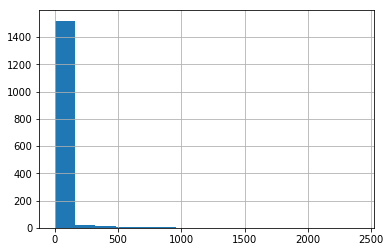

In [18]:
data.groupby('Number of Reviews')['Rating'].count().hist(bins=15)

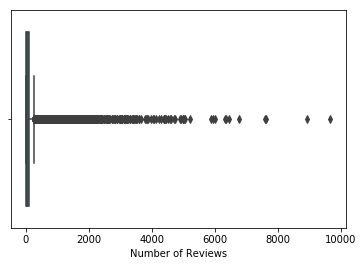

In [19]:
sns.boxplot(data['Number of Reviews'])

Что по боксплоту, что по гистограмме - можно сделать предположение, что чаще всего клиенты не оставляют отзывы. Предположим, что чем лучше ресторан, тем больше у него отзывов.

In [34]:
# здесь подбирала такое количество отзывов, чтобы построить более 
# показательную гистограмму и посмотреть распределение, вместе с
# тестовым набором
is_reviews=data.loc[data['Number of Reviews'] > 1000]

In [35]:
is_reviews

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
44,id_44,Edinburgh,"['Seafood', 'European', 'British', 'Soups', 'S...",266.0,$$$$,4567.0,"[['Come for the wine more than the food', 'Des...",/Restaurant_Review-g186525-d720945-Reviews-The...,d720945,0,0.0
77,id_77,London,"['Asian', 'American', 'British', 'Central Amer...",1576.0,$$ - $$$,3190.0,"[['Evening medl', 'Tasty food!!'], ['01/03/201...",/Restaurant_Review-g186338-d953797-Reviews-Pla...,d953797,0,0.0
188,id_188,London,"['Japanese', 'Sushi', 'Asian', 'Thai', 'Fusion...",3903.0,$$ - $$$,1594.0,"[['Night out', 'OMG! All you can eat Authentic...",/Restaurant_Review-g186338-d1180250-Reviews-In...,d1180250,0,0.0
216,id_216,Barcelona,"['Seafood', 'Mediterranean', 'European', 'Span...",981.0,$$ - $$$,4996.0,"[['Great place, locals go here to eat...', 'Ni...",/Restaurant_Review-g187497-d717275-Reviews-La_...,d717275,0,0.0
362,id_362,Rome,"['Italian', 'Bar', 'Pizza', 'Pub', 'Vegetarian...",474.0,$$ - $$$,1989.0,"[['Good Beer & Food - Does what it says !!', '...",/Restaurant_Review-g187791-d1071387-Reviews-Bi...,d1071387,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49614,id_106,Edinburgh,"['American', 'Bar', 'British', 'Pub', 'Scottis...",107.0,$$ - $$$,1072.0,"[['Great burgers!', 'Great for meat lovers, bu...",/Restaurant_Review-g186525-d1811602-Reviews-Th...,d1811602,1,4.5
49625,id_1236,Rome,"['Italian', 'Vegetarian Friendly']",1237.0,$,1593.0,"[['Underwhelming', 'Best...Pasta....Ever!'], [...",/Restaurant_Review-g187791-d1010711-Reviews-Ca...,d1010711,1,3.5
49759,id_319,Paris,"['American', 'Kosher']",320.0,$$ - $$$,1068.0,"[[""Good place, busy place.... but don't expec....",/Restaurant_Review-g187147-d1832198-Reviews-Sc...,d1832198,1,4.0
49943,id_13,Edinburgh,"['European', 'British', 'Scottish', 'Vegetaria...",14.0,$$$$,2297.0,"[['Excellent!', 'Definitely try.'], ['01/02/20...",/Restaurant_Review-g186525-d1830500-Reviews-Ca...,d1830500,1,4.5


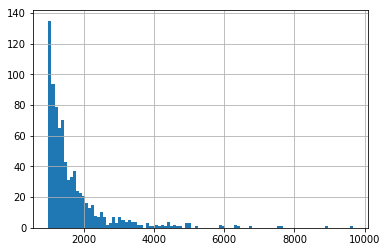

In [36]:
is_reviews['Number of Reviews'].hist(bins=100)

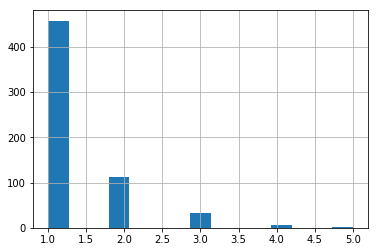

In [37]:
is_reviews.groupby('Number of Reviews')['Rating'].count().hist(bins=15)

In [38]:
is_rating=data.loc[data['Rating'] > 0]

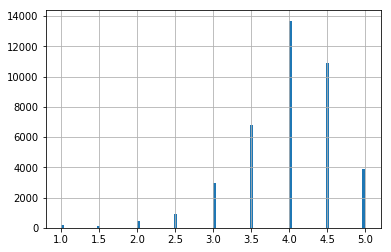

In [40]:
is_rating['Rating'].hist(bins=100)

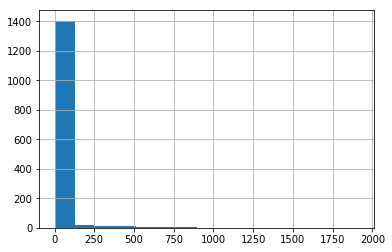

In [41]:
is_rating.groupby('Number of Reviews')['Rating'].count().hist(bins=15)

Ощущаю, что я запуталась. Пыталась посмотреть связь количества отзывов и оценки у ресторана. Похоже, что предположение о том, что чем больше рейтинг у ресторана, тем больше отзывов не подтвердилось. 

In [ ]:
#data.pivot_table(index='City', columns='Number of Reviews', стр 213)

In [42]:
data[pd.isnull(data['Reviews'])]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
8168,id_8168,Lisbon,NaN,3389.0,$$ - $$$,2.0,NaN,/Restaurant_Review-g189158-d12683988-Reviews-O...,d12683988,0,0.0
9608,id_9608,Vienna,NaN,1779.0,$$ - $$$,NaN,NaN,/Restaurant_Review-g190454-d12605368-Reviews-R...,d12605368,0,0.0


In [ ]:
#фактически только два пропуска, но еще в таблице мы можем увидеть пустые значения в квадратных скобках []
data.sample(10)

In [43]:
#посмотрим сколько таких значенй
data.Reviews.value_counts()

[[], []]                                                                                                                 8112
[['Sat night', 'Can\'t even explain.. "A" place.. A "100...'], ['10/22/2017', '05/11/2017']]                                2
[['Delicious'], ['06/06/2017']]                                                                                             2
[['Excellent cuisine, friendly and helpful se...', 'Not tasty'], ['12/25/2016', '06/05/2016']]                              2
[['Very cozy!', 'Service rate: 1'], ['01/17/2016', '11/18/2015']]                                                           2
                                                                                                                         ... 
[['amazing experience, excellent cocktails an...', 'A bar you must go with no doubt!'], ['01/04/2018', '01/03/2018']]       1
[['Cosy neighborhood cafe in Munich Sendling'], ['09/19/2017']]                                                       

Пустых значений не так много, проверила, что некоторые просто не подгрузились с сайта, поэтому будем иметь в виду эту возможность. 

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [6]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [ ]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [ ]:
data.head(5)

In [ ]:
data.sample(5)

#### Возьмем следующий признак "Price Range".

In [55]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


label_encoder = LabelEncoder()

data['pr_range'] = pd.Series(label_encoder.fit_transform(data['Price Range']))
data.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

TypeError: argument must be a string or number

Не могу понять почему не срабатывает LabelEncoder, в общей функции ниже новая колонка создается. 

Предположим, что чем дороже ресторан, тем выше у него рейтинг.

In [66]:
data.loc[data['Price Range'] == '$', 'Price Range'] = 1
data.loc[data['Price Range'] == '$$ - $$$', 'Price Range'] = 2
data.loc[data['Price Range'] == '$$$$', 'Price Range'] = 3

In [67]:
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


In [68]:
data['Price Range'].fillna(2, inplace=True)

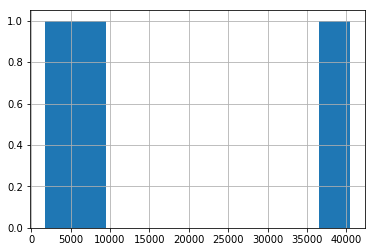

In [72]:
data.groupby('Price Range')['Rating'].count().hist()

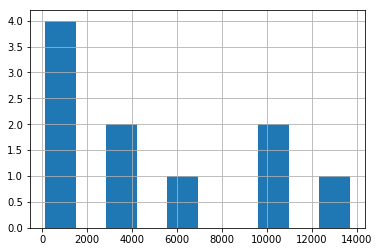

In [73]:
data.groupby('Rating')['Price Range'].count().hist()

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

In [ ]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

In [ ]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

In [ ]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

In [ ]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

In [ ]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

In [ ]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

In [ ]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

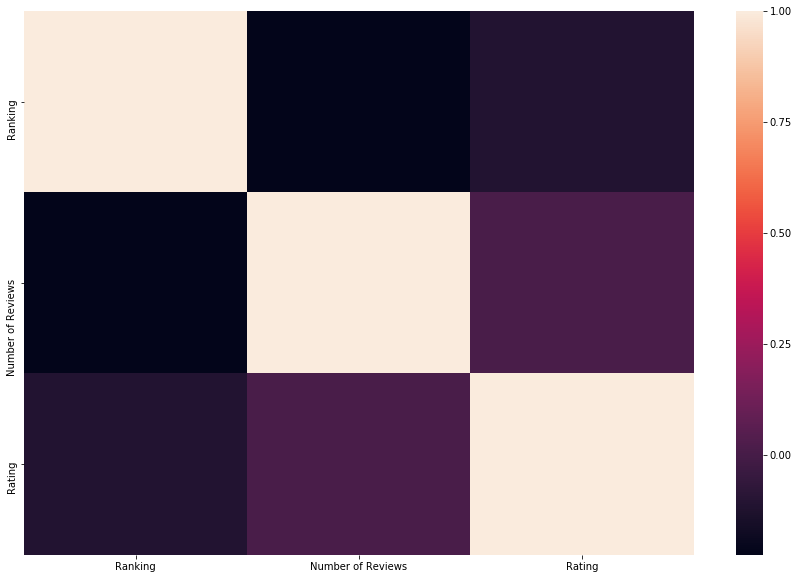

In [131]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [ ]:
# функция для примера
# МАЕ - 0.43
def preproc_data_0(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [79]:
# Участвую столбцы 'Ranking', 'Number of Reviews', 'sample', 'Rating',
#        'pr_range', 'City_-all-'
# MAE - 0.026
def preproc_data_1(df_input, row_count = None):
    '''includes several functions to pre-process the predictor data.'''
    
    if row_count is not None:
        df_output = df_input.head(row_count).copy()
    else:
        df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
#   df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    df_output['Cuisine Style'].fillna("['none']", inplace=True)
    df_output['Reviews'].fillna("[[],[]]", inplace=True)
    df_output['Restaurant_id'] = df_output['Restaurant_id'].apply(lambda x: x[3:])
    
    
#     Price range
    df_output['Price Range'].fillna("$$ - $$$", inplace=True)
    df_output['pr_range'] = pd.Series(label_encoder.fit_transform(df_output['Price Range']))
    
#     Number of reviews
    df_output['Number of Reviews'] = df_output \
     .apply(lambda row: df_output[df_output.City==row.City] \
            ['Number of Reviews'].median() if pd.isna(row['Number of Reviews']) else row['Number of Reviews'], axis=1)
    
#     Cusine style
    prepared_data=df_output['Cuisine Style'].apply(lambda x: x.strip('][').split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Cuisine Style'], axis=1)
    
    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'pr_range'], value_name = 'cusine') \
      .drop(['variable'], axis=1) \
      .dropna(subset=['cusine'])
    
#     Reviews
    prepared_data=df_output['Reviews'].apply(lambda x: x.strip('][').partition('], [')[2].split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Reviews'], axis=1)

    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'cusine', 'pr_range'], value_name = 'date') \
    .drop(['variable'], axis=1) \
    .dropna(subset=['date'])

    df_output['date'] = pd.to_datetime(df_output['date'])
    
    #df_output['cusine_1'] = pd.Series(label_encoder.fit_transform(df_output['cusine']))
    

    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)

    
    
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(['date'], axis = 1, inplace=True)
    
    return df_output

In [117]:
# Участвую столбцы 'Ranking', 'Number of Reviews', 'sample', 'Rating', 'pr_range',
#        'City_','cusine_'''
# MAE = 0.044 (добавленные через даммис без какой-либо обработки кухни ухудшили результат и не одна из кухонь не была определена, как важная)
def preproc_data_2(df_input, row_count = None):
    '''includes several functions to pre-process the predictor data.'''
    
    if row_count is not None:
        df_output = df_input.head(row_count).copy()
    else:
        df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
#   df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    df_output['Cuisine Style'].fillna("['none']", inplace=True)
    df_output['Reviews'].fillna("[[],[]]", inplace=True)
    df_output['Restaurant_id'] = df_output['Restaurant_id'].apply(lambda x: x[3:])
    
    
#     Price range
    df_output['Price Range'].fillna("$$ - $$$", inplace=True)
    df_output['pr_range'] = pd.Series(label_encoder.fit_transform(df_output['Price Range']))
    
#     Number of reviews
    df_output['Number of Reviews'] = df_output \
     .apply(lambda row: df_output[df_output.City==row.City] \
            ['Number of Reviews'].median() if pd.isna(row['Number of Reviews']) else row['Number of Reviews'], axis=1)
    
#     Cusine style
    prepared_data=df_output['Cuisine Style'].apply(lambda x: x.strip('][').split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Cuisine Style'], axis=1)
    
    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'pr_range'], value_name = 'cusine') \
      .drop(['variable'], axis=1) \
      .dropna(subset=['cusine'])
    
#     Reviews
    prepared_data=df_output['Reviews'].apply(lambda x: x.strip('][').partition('], [')[2].split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Reviews'], axis=1)

    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'cusine', 'pr_range'], value_name = 'date') \
    .drop(['variable'], axis=1) \
    .dropna(subset=['date'])

    df_output['date'] = pd.to_datetime(df_output['date'])
    
    #df_output['cusine_1'] = pd.Series(label_encoder.fit_transform(df_output['cusine']))
    

    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    df_output = pd.get_dummies(df_output, columns=[ 'cusine',], dummy_na=True)

    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(['date'], axis = 1, inplace=True)
    
    return df_output

In [118]:
# Участвую столбцы 'Number of Reviews', 'sample', 'Rating', 'pr_range',
#        'City_'
# MAE = 0.276 (убрала столбец Ranking, повысилась важность Number of Reviews и pr_range)
def preproc_data_3(df_input, row_count = None):
    '''includes several functions to pre-process the predictor data.'''
    
    if row_count is not None:
        df_output = df_input.head(row_count).copy()
    else:
        df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
#   df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    df_output['Cuisine Style'].fillna("['none']", inplace=True)
    df_output['Reviews'].fillna("[[],[]]", inplace=True)
    df_output['Restaurant_id'] = df_output['Restaurant_id'].apply(lambda x: x[3:])
    
    
#     Price range
    df_output['Price Range'].fillna("$$ - $$$", inplace=True)
    df_output['pr_range'] = pd.Series(label_encoder.fit_transform(df_output['Price Range']))
    
#     Number of reviews
    df_output['Number of Reviews'] = df_output \
     .apply(lambda row: df_output[df_output.City==row.City] \
            ['Number of Reviews'].median() if pd.isna(row['Number of Reviews']) else row['Number of Reviews'], axis=1)
    
#     Cusine style
    prepared_data=df_output['Cuisine Style'].apply(lambda x: x.strip('][').split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Cuisine Style'], axis=1)
    
    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'pr_range'], value_name = 'cusine') \
      .drop(['variable'], axis=1) \
      .dropna(subset=['cusine'])
    
#     Reviews
    prepared_data=df_output['Reviews'].apply(lambda x: x.strip('][').partition('], [')[2].split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Reviews'], axis=1)

    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'cusine', 'pr_range'], value_name = 'date') \
    .drop(['variable'], axis=1) \
    .dropna(subset=['date'])

    df_output['date'] = pd.to_datetime(df_output['date'])
    
    #df_output['cusine_1'] = pd.Series(label_encoder.fit_transform(df_output['cusine']))
    

    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(['date', 'Ranking'], axis = 1, inplace=True)
    
    return df_output

In [14]:
# Участвую столбцы 'Restaurant_id', 'Number of Reviews', 'sample', 'Rating', 'pr_range',
#        'City_'
# MAE = 0.0269 (Restaurant_id добавила - оказался значимым столбцом, 'Ranking' так и не добавляла)
def preproc_data_4(df_input, row_count = None):
    '''includes several functions to pre-process the predictor data.'''
    
    if row_count is not None:
        df_output = df_input.head(row_count).copy()
    else:
        df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
#   df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    df_output['Cuisine Style'].fillna("['none']", inplace=True)
    df_output['Reviews'].fillna("[[],[]]", inplace=True)
    df_output['Restaurant_id'] = df_output['Restaurant_id'].apply(lambda x: x[3:])
    
    df_output['Restaurant_id'] = pd.to_numeric(df_output['Restaurant_id'], errors='coerce').fillna(0, downcast='infer')
    
    
#     Price range
    df_output['Price Range'].fillna("$$ - $$$", inplace=True)
    df_output['pr_range'] = pd.Series(label_encoder.fit_transform(df_output['Price Range']))
    
#     Number of reviews
    df_output['Number of Reviews'] = df_output \
     .apply(lambda row: df_output[df_output.City==row.City] \
            ['Number of Reviews'].median() if pd.isna(row['Number of Reviews']) else row['Number of Reviews'], axis=1)
    
#     Cusine style
    prepared_data=df_output['Cuisine Style'].apply(lambda x: x.strip('][').split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Cuisine Style'], axis=1)
    
    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'pr_range'], value_name = 'cusine') \
      .drop(['variable'], axis=1) \
      .dropna(subset=['cusine'])
    
#     Reviews
    prepared_data=df_output['Reviews'].apply(lambda x: x.strip('][').partition('], [')[2].split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Reviews'], axis=1)

    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'cusine', 'pr_range'], value_name = 'date') \
    .drop(['variable'], axis=1) \
    .dropna(subset=['date'])

    df_output['date'] = pd.to_datetime(df_output['date'])
    
    #df_output['cusine_1'] = pd.Series(label_encoder.fit_transform(df_output['cusine']))
    

    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(['date', 'Ranking'], axis = 1, inplace=True)
    
    return df_output

In [8]:
# Участвую столбцы 'Restaurant_id', 'Number of Reviews', 'sample', 'Rating', 'pr_range', 
#        'City_', 'Ranking'
# MAE = 0.269 (Restaurant_id добавила - оказался значимым столбцом, 'Ranking' тоже значимый)
def preproc_data_5(df_input, row_count = None):
    '''includes several functions to pre-process the predictor data.'''
    
    if row_count is not None:
        df_output = df_input.head(row_count).copy()
    else:
        df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
#   df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    df_output['Cuisine Style'].fillna("['none']", inplace=True)
    df_output['Reviews'].fillna("[[],[]]", inplace=True)
    df_output['Restaurant_id'] = df_output['Restaurant_id'].apply(lambda x: x[3:])
    
    df_output['Restaurant_id'] = pd.to_numeric(df_output['Restaurant_id'], errors='coerce').fillna(0, downcast='infer')
    
    
#     Price range
    df_output['Price Range'].fillna("$$ - $$$", inplace=True)
    df_output['pr_range'] = pd.Series(label_encoder.fit_transform(df_output['Price Range']))
    
#     Number of reviews
    df_output['Number of Reviews'] = df_output \
     .apply(lambda row: df_output[df_output.City==row.City] \
            ['Number of Reviews'].median() if pd.isna(row['Number of Reviews']) else row['Number of Reviews'], axis=1)
    
#     Cusine style
    prepared_data=df_output['Cuisine Style'].apply(lambda x: x.strip('][').split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Cuisine Style'], axis=1)
    
    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'pr_range'], value_name = 'cusine') \
      .drop(['variable'], axis=1) \
      .dropna(subset=['cusine'])
    
#     Reviews
    prepared_data=df_output['Reviews'].apply(lambda x: x.strip('][').partition('], [')[2].split(', ')) \
      .apply(pd.Series) \
      .merge(df_output, left_index = True, right_index = True) \
      .drop(['Reviews'], axis=1)

    df_output = prepared_data.melt(id_vars = ['Restaurant_id', 'City', 'Ranking', 'Price Range',
       'Number of Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating', 'cusine', 'pr_range'], value_name = 'date') \
    .drop(['variable'], axis=1) \
    .dropna(subset=['date'])

    df_output['date'] = pd.to_datetime(df_output['date'])
    
    #df_output['cusine_1'] = pd.Series(label_encoder.fit_transform(df_output['cusine']))
    

    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(['date'], axis = 1, inplace=True)
    
    return df_output

In [7]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


label_encoder = LabelEncoder()

Какие варианты я хочу протестировать?
Что будет, если убрать Ranking.
Влияет ли как либо Restaurant_id.
Если перекодировать cusine без группировки или с группировкой.
Если подгрузить доп данные.
Если оставить колонку с датой.
Если перевести отзывы в числовой вид.



In [28]:
df_preproc = preproc_data_5(data, 5)
print(df_preproc.columns)
df_preproc.head()

Index(['Restaurant_id', 'Ranking', 'Number of Reviews', 'sample', 'Rating',
       'pr_range', 'City_Bratislava', 'City_Edinburgh', 'City_Helsinki',
       'City_London', 'City_Paris', 'City_nan'],
      dtype='object')


,Restaurant_id,Ranking,Number of Reviews,sample,Rating,pr_range,City_Bratislava,City_Edinburgh,City_Helsinki,City_London,City_Paris,City_nan
0,0,12963.0,4.0,0,0.0,0,0,0,0,0,1,0
1,1,106.0,97.0,0,0.0,0,0,0,1,0,0,0
2,2,810.0,28.0,0,0.0,0,0,1,0,0,0,0
3,3,1669.0,202.0,0,0.0,1,0,0,0,1,0,0
4,4,37.0,162.0,0,0.0,1,1,0,0,0,0,0


In [11]:
df_preproc = preproc_data_5(data)
print(df_preproc.columns)
df_preproc

Index(['Restaurant_id', 'Ranking', 'Number of Reviews', 'sample', 'Rating',
       'pr_range', 'City_Amsterdam', 'City_Athens', 'City_Barcelona',
       'City_Berlin', 'City_Bratislava', 'City_Brussels', 'City_Budapest',
       'City_Copenhagen', 'City_Dublin', 'City_Edinburgh', 'City_Geneva',
       'City_Hamburg', 'City_Helsinki', 'City_Krakow', 'City_Lisbon',
       'City_Ljubljana', 'City_London', 'City_Luxembourg', 'City_Lyon',
       'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo',
       'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich', 'City_nan'],
      dtype='object')


,Restaurant_id,Ranking,Number of Reviews,sample,Rating,pr_range,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,0,12963.0,4.0,0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,106.0,97.0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,810.0,28.0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1669.0,202.0,0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,37.0,162.0,0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262527,93,94.0,1480.0,1,4.5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262528,93,94.0,1480.0,1,4.5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262529,93,94.0,1480.0,1,4.5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262530,93,94.0,1480.0,1,4.5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [12]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242398 entries, 0 to 262531
Data columns (total 38 columns):
Restaurant_id        242398 non-null int64
Ranking              242398 non-null float64
Number of Reviews    242398 non-null float64
sample               242398 non-null int64
Rating               242398 non-null float64
pr_range             242398 non-null int64
City_Amsterdam       242398 non-null uint8
City_Athens          242398 non-null uint8
City_Barcelona       242398 non-null uint8
City_Berlin          242398 non-null uint8
City_Bratislava      242398 non-null uint8
City_Brussels        242398 non-null uint8
City_Budapest        242398 non-null uint8
City_Copenhagen      242398 non-null uint8
City_Dublin          242398 non-null uint8
City_Edinburgh       242398 non-null uint8
City_Geneva          242398 non-null uint8
City_Hamburg         242398 non-null uint8
City_Helsinki        242398 non-null uint8
City_Krakow          242398 non-null uint8
City_Lisbon          24

In [13]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [14]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [15]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((48738, 37), (193660, 37), (193660, 36), (154928, 36), (38732, 36))

# Model 
Сам ML

In [16]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [17]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [18]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


In [19]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.026965816379221293


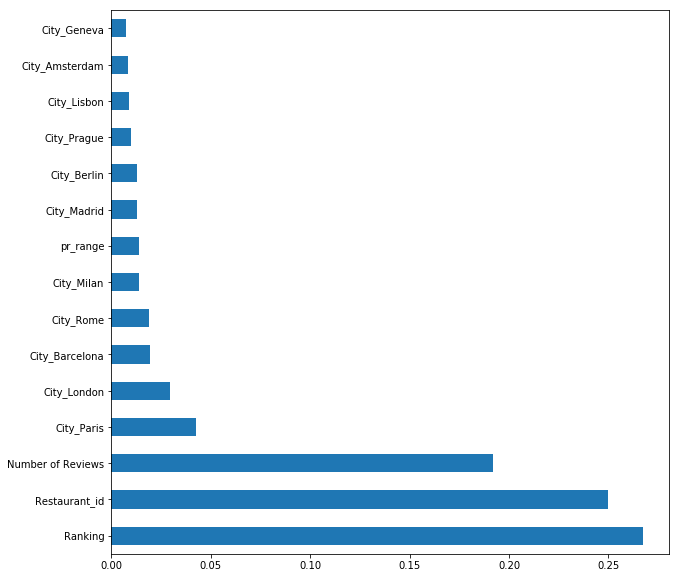

In [20]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [21]:
test_data.sample(10)

,Restaurant_id,Ranking,Number of Reviews,Rating,pr_range,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
234098,7178,827.0,1162.0,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50536,949,218.0,755.0,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
51814,3119,5782.0,27.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181581,534,795.0,84.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138077,6811,705.0,61.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102268,5287,1928.0,18.0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
83289,9386,2307.0,958.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234770,9326,1907.0,35.0,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101545,2826,791.0,44.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
102877,7317,929.0,189.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test_data = test_data.drop(['Rating'], axis=1)

In [23]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [24]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


In [31]:
predict_submission

array([4.38 , 4.61 , 4.8  , ..., 3.815, 3.815, 3.815])

In [ ]:
sample_submission['Rating'] = predict_submission[:10000]
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
